In [1]:
ls

Bigmart_Test(1).csv   Bigmart_Train(1).csv  bigmart.ipynb


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
!pip3 install xgboost


     |████████████████████████████████| 1.8 MB 92 kB/s eta 0:00:012


In [5]:
sales_data = pd.read_csv("./train.csv")
sales_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [6]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#So, we have missing values in Item_Weight and Outlet_Size column. We need to impute these missing values with appropriate ones. We usually replace missing values in numerical columns with mean and in categorical columns with mode.

In [9]:
sales_data['Item_Weight'] = sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean())
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].fillna(sales_data['Outlet_Size'].mode()[0])
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Preprocessing


In [10]:
#We need to encode the categorical variables to numerical ones so our ML model understands the data.


In [11]:
sales_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [12]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
sales_data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [14]:
sales_data['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# Now we'll do label encoding to transform categorical values to numerical values

In [16]:
encoder = LabelEncoder()
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])
sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])
sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])
sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])
sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])
sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])
sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

sales_data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

In [17]:
#Exploratory Data Analysis

In [18]:
sales_data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

In [19]:
# We can use a heatmap to check correlation between the variables.
corr = sales_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<AxesSubplot:>

In [20]:
#There isn't much correlation between the variables, except that if Item_MRP increases, Item_Outlet_Sales increases.

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=sales_data)
plt.grid()

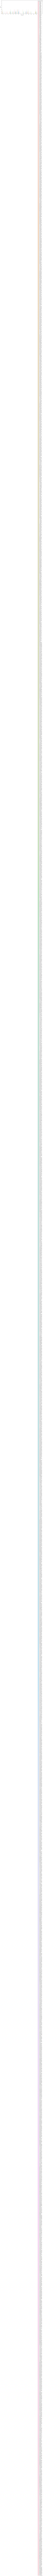

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x='Item_Type', hue='Item_Outlet_Sales', data=sales_data);

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x='Item_Type', data=sales_data);

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

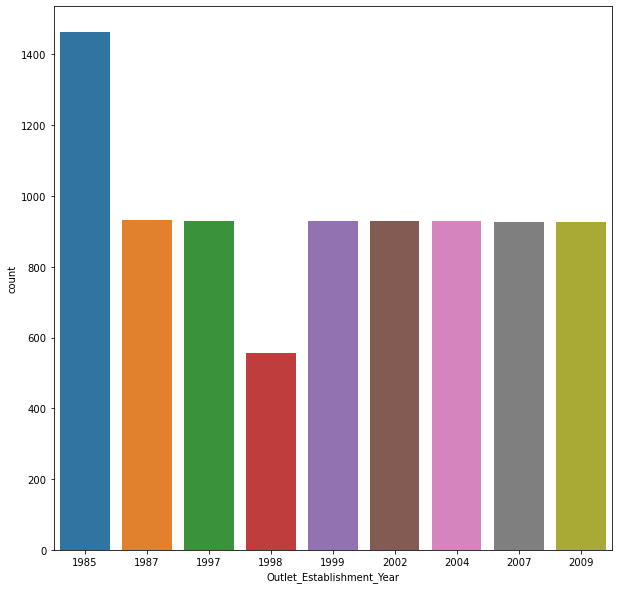

In [25]:
# Which year were there highest sales?
plt.figure(figsize=(10,10))
sns.countplot(x="Outlet_Establishment_Year", data=sales_data)

In [26]:
# What type of outlet usually has more sales?
plt.figure(figsize=(10,10))
sns.countplot(x="Outlet_Type", data=sales_data)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

In [28]:
#Supermarket Type1 have the most sales, much higher than other types so the mall owners should consider building more of these types in other locations.

In [29]:
# We need to split the data
X = sales_data.drop(columns='Item_Outlet_Sales',axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = sales_data['Item_Outlet_Sales'] # Target

# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.

In [30]:
print(X.shape,X_train.shape)

(8523, 11) (6818, 11)


In [31]:
#We're going to build a LinearRegression model and XGBoost model and compare. Finally, we will use the one with higher accuracy.

In [32]:
model1 = XGBRegressor()

# Now we need to train the model
model1.fit(X_train,y_train) # fitting means training

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [34]:
train_pred1 = model1.predict(X_train)
train_pred1

array([2172.693 , 2844.0671, 3308.6353, ..., 3363.3127, 1717.4066,
       2013.252 ], dtype=float32)

In [35]:
train_pred2 = model2.predict(X_train)
train_pred2

array([2327.41867944, 3031.89278067, 3867.31973582, ..., 2567.89841379,
       2376.92087115, 3052.32198326])

In [36]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
RSQscore1 = metrics.r2_score(y_train,train_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1) 

R squared error for XGB Regressor: 0.8549833167058186


In [37]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_train,train_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 

R squared error for Linear Regressor: 0.514058329918831


For training data, linear regressor is a better model for our project as it's R squared error is closer to 0. But we can still check with other models to find best model.

But keep in mind that we used training data to check accuracy. We need to check using test data for a better understanding.

In [38]:
test_pred1 = model1.predict(X_test)
test_pred1

array([2098.7969, 4360.376 , 1454.3608, ..., 2883.5608, 1158.3351,
       3164.4902], dtype=float32)

In [39]:
test_pred2 = model2.predict(X_test)
test_pred2

array([2521.30878303, 3777.79279852, 1314.26315325, ..., 2255.36856828,
       4513.18525798, 3595.71438136])

In [40]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
RSQscore1 = metrics.r2_score(y_test,test_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1)

R squared error for XGB Regressor: 0.5191234777241828


In [41]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_test,test_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 

R squared error for Linear Regressor: 0.4949823046797899



So basically the workflow is like this: Import libraries and dataset -> check for missing values -> perform necessary imputation -> data preprocessing -> exploratory data analysis -> split data -> train model -> check its accuracy -> improve model or try other ones.

To get better accuracy, try different models or use more training data.